1. Опишите какой результат нейросети получен в зависимости от:
- числа нейронов в слое для друхслойной сети
- числа слоев (2, 3, 5, 10) при близких размерах сети (число тренируемых параметров)
- фиксируйте для треинровочноог и тестового набора метрики accuracy
2. Проверьте работыу разных оптимизаторов для одной из моделей
3. Что помогло вам улучшить качество нейросети на тестовом наборе?
4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качетсво модели по каждому классу отдельно (точностьб полнота)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import itertools
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.datasets import fashion_mnist

tf.random.set_seed(1)

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.min(), train_images.max(), train_images.shape, test_images.shape

(0, 255, (60000, 28, 28), (10000, 28, 28))

In [3]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Label is 8


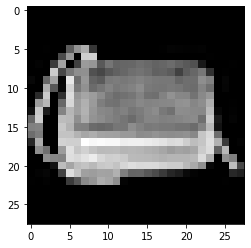

In [4]:
ind = np.random.randint(0, train_images.shape[0])
plt.imshow(train_images[ind], cmap='gray')
print(f'Label is {train_labels[ind]}')

In [5]:
#нормализация данных
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images.min(), train_images.max()

(0.0, 1.0)

In [6]:
# Вытягивание признаков
X_train = train_images.reshape((-1, 28 * 28))
X_test = test_images.reshape((-1, 28 * 28))
X_train.shape, X_train.shape, X_train.min(), X_train.max()

((60000, 784), (60000, 784), 0.0, 1.0)

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[:2], y_test[:2]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [8]:
model = Sequential()

model.add(Dense(64, input_shape=(28 * 28,), activation="relu"))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation="relu"),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [10]:
config = model.get_config()
config

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_3_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bia

In [11]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
                   epochs=5,
                   batch_size=256,
                   verbose=1,
                   validation_data=(X_test, y_test))

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.6531 - accuracy: 0.7806 - val_loss: 0.5248 - val_accuracy: 0.8178
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4403 - accuracy: 0.8485 - val_loss: 0.4687 - val_accuracy: 0.8384
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8604 - val_loss: 0.4624 - val_accuracy: 0.8381
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3810 - accuracy: 0.8659 - val_loss: 0.4303 - val_accuracy: 0.8467
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3548 - accuracy: 0.8747 - val_loss: 0.4057 - val_accuracy: 0.8558


In [13]:
history = model.fit(X_train, y_train,
                   epochs=5,
                   batch_size=1000,
                   verbose=1,
                   validation_split=0.2)

Epoch 1/5
48/48 [==============================] - 1s 13ms/step - loss: 0.3315 - accuracy: 0.8826 - val_loss: 0.3257 - val_accuracy: 0.8844
Epoch 2/5
48/48 [==============================] - 1s 11ms/step - loss: 0.3219 - accuracy: 0.8850 - val_loss: 0.3227 - val_accuracy: 0.8867
Epoch 3/5
48/48 [==============================] - 1s 12ms/step - loss: 0.3168 - accuracy: 0.8874 - val_loss: 0.3246 - val_accuracy: 0.8847
Epoch 4/5
48/48 [==============================] - 1s 11ms/step - loss: 0.3120 - accuracy: 0.8894 - val_loss: 0.3225 - val_accuracy: 0.8865
Epoch 5/5
48/48 [==============================] - 1s 12ms/step - loss: 0.3091 - accuracy: 0.8894 - val_loss: 0.3201 - val_accuracy: 0.8871


In [14]:
history.history

{'loss': [0.33153223991394043,
  0.3218823969364166,
  0.31679680943489075,
  0.31200867891311646,
  0.30910760164260864],
 'accuracy': [0.8825833201408386,
  0.8850208520889282,
  0.8874375224113464,
  0.8894374966621399,
  0.8894166946411133],
 'val_loss': [0.3256526291370392,
  0.3226798176765442,
  0.32457756996154785,
  0.3224799335002899,
  0.3200583755970001],
 'val_accuracy': [0.8844166398048401,
  0.8867499828338623,
  0.8846666812896729,
  0.8865000009536743,
  0.8870833516120911]}

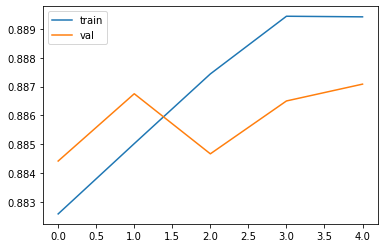

In [15]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()

In [16]:
loss, metric = model.evaluate(X_test, y_test)
loss, metric

313/313 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8688


(0.37029141187667847, 0.8687999844551086)

In [17]:
prediction = model.predict(X_test[1][None])
prediction

1/1 [==============================] - 0s 107ms/step


array([[9.8511320e-01, 5.0844427e-02, 9.9999952e-01, 9.3388647e-01,
        9.9996173e-01, 1.3475081e-07, 9.9988008e-01, 5.4483131e-05,
        5.0093353e-01, 1.8246234e-06]], dtype=float32)

In [18]:
pred_labels = np.argmax(prediction, axis=1)
pred_labels

array([2], dtype=int64)

In [19]:
test_labels[:3]

array([9, 2, 1], dtype=uint8)

In [20]:
model.save_weights('model_weights.h5')

model.save('model.h5')

In [21]:
model = load_model('model.h5')

### 1. Изменение числа нейронов и слоев

In [22]:
%%time

res = pd.DataFrame(columns=['n1', 'n2', 'accuracy', 'val_accuracy'])
n_list = list(map(lambda x: 10 * (2 ** x), range(1, 6)))

for n1 in n_list:
    
    for n2 in n_list:
        
        model = Sequential([
        Dense(n1, input_shape=(28 * 28,), activation='relu'),
        Dense(n2, activation='relu'),
        Dense(10, activation='sigmoid')
        ])
        
        model.summary()
        model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train,
                            epochs=15,
                            batch_size=1000,
                            verbose=0,
                            validation_data=(X_test, y_test))
        val_accuracy = history.history['val_accuracy'][-1]
        accuracy = history.history['accuracy'][-1]
        res = res.append({'n1': n1, 'n2': n2, 'val_accuracy': val_accuracy, 'accuracy': accuracy}, ignore_index=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                15700     
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                15700     
                                                                 
 dense_10 (Dense)           

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 80)                62800     
                                                                 
 dense_37 (Dense)            (None, 20)                1620      
                                                                 
 dense_38 (Dense)            (None, 10)                210       
                                                                 
Total params: 64,630
Trainable params: 64,630
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 80)                62800     
                                                                 
 dense_40 (Dense)            (None, 40)          

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 320)               251200    
                                                                 
 dense_67 (Dense)            (None, 20)                6420      
                                                                 
 dense_68 (Dense)            (None, 10)                210       
                                                                 
Total params: 257,830
Trainable params: 257,830
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 320)               251200    
                                                                 
 dense_70 (Dense)            (None, 40)        

In [23]:
res.sort_values(by='val_accuracy', ascending=False).head(10)

,n1,n2,accuracy,val_accuracy
22,320.0,80.0,0.808283,0.7987
24,320.0,320.0,0.808533,0.7980
23,320.0,160.0,0.807633,0.7967
16,160.0,40.0,0.798800,0.7901
19,160.0,320.0,0.800333,0.7898
17,160.0,80.0,0.799450,0.7886
18,160.0,160.0,0.801400,0.7885
21,320.0,40.0,0.798733,0.7860
12,80.0,80.0,0.796333,0.7853
20,320.0,20.0,0.792467,0.7815


На валидационных данных лучше работает модель с количеством нейронов 160 и 320.

### Добавим дополнительные слои

In [24]:
# число тренируемых параметров для лучшей двуслойной сети 
l1 = (28*28) * 160 +160
l2 = 320 * 160 +320
l1 + l2

177120

In [25]:
%%time
layers = {2:180, 3:155, 5:130, 10:100}
res_2 = pd.DataFrame(columns=['n', 'accuracy', 'val_accuracy'])

for l in [2, 3, 5, 10]:
    n = layers[l]
    model = Sequential([Dense(n, input_shape=(28 * 28,), activation='relu')])
    
    for _ in range(l - 1):
        model.add(Dense(n, activation='relu'))
    
    model.add(Dense(10, activation='sigmoid'))
    
    model.summary()
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                            epochs=25,
                            batch_size=1000,
                            verbose=0,
                            validation_data=(X_test, y_test))
    val_accuracy = history.history['val_accuracy'][-1]
    accuracy = history.history['accuracy'][-1]
    res_2 = res_2.append({'n': n, 'val_accuracy': val_accuracy, 'accuracy': accuracy}, ignore_index=True)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 180)               141300    
                                                                 
 dense_82 (Dense)            (None, 180)               32580     
                                                                 
 dense_83 (Dense)            (None, 10)                1810      
                                                                 
Total params: 175,690
Trainable params: 175,690
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 155)               121675    
                                                                 
 dense_85 (Dense)       

In [26]:
res_2

,n,accuracy,val_accuracy
0,180.0,0.821433,0.8126
1,155.0,0.825217,0.8155
2,130.0,0.815417,0.8110
3,100.0,0.744033,0.7608


Очень глубокая сеть показала себя плохо. С остальными можно пробовать работать дальше

### 2. Оптимизаторы

In [27]:
res_3 = pd.DataFrame(columns=['optim', 'accuracy', 'val_accuracy'])

for optim in enumerate([keras.optimizers.SGD(),
                        keras.optimizers.rmsprop.RMSprop(),
                        keras.optimizers.adam.Adam()]):
    optim_name = optim[1].get_config()['name']
    print(f'Оптимизатор: {optim_name}')
    
    model = Sequential([Dense(155, input_shape=(28 * 28,), activation='relu'),
                          Dense(155, activation='relu'),
                          Dense(155, activation='relu'),
                          Dense(10, activation='sigmoid')
                         ])
    
    model.summary()
    model.compile(optimizer=optim_name, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                            epochs=25,
                            batch_size=1000,
                            verbose=0,
                            validation_data=(X_test, y_test))
    
    val_accuracy = history.history['val_accuracy'][-1]
    accuracy = history.history['accuracy'][-1]
    res_3 = res_3.append({'optim': optim_name, 'val_accuracy': val_accuracy, 'accuracy': accuracy}, ignore_index=True)

Оптимизатор: SGD
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 155)               121675    
                                                                 
 dense_106 (Dense)           (None, 155)               24180     
                                                                 
 dense_107 (Dense)           (None, 155)               24180     
                                                                 
 dense_108 (Dense)           (None, 10)                1560      
                                                                 
Total params: 171,595
Trainable params: 171,595
Non-trainable params: 0
_________________________________________________________________
Оптимизатор: RMSprop
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape           

In [28]:
res_3

,optim,accuracy,val_accuracy
0,SGD,0.826883,0.8160
1,RMSprop,0.911733,0.8856
2,Adam,0.930717,0.8882


Самый сильный рост метрики получился при смене оптимизаторов. Количество эпох тоже дает хороший прирост. Размеры сети и батча меняют результат, но спрогнозировать изменения обычно не получается, нужны эксперименты. Часто сети из большого числа слоев показывают себя хуже.

### 3. Матрица ошибок по классам

In [29]:
model = Sequential([Dense(155, input_shape=(28 * 28,), activation='relu'),
                          Dense(155, activation='relu'),
                          Dense(155, activation='relu'),
                          Dense(10, activation='sigmoid')
                         ])
    
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                            epochs=45,
                            batch_size=1000,
                            verbose=0,
                            validation_data=(X_test, y_test))
    
loss, metric = model.evaluate(X_test, y_test)
loss, metric

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 155)               121675    
                                                                 
 dense_118 (Dense)           (None, 155)               24180     
                                                                 
 dense_119 (Dense)           (None, 155)               24180     
                                                                 
 dense_120 (Dense)           (None, 10)                1560      
                                                                 
Total params: 171,595
Trainable params: 171,595
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.3937 - accuracy: 0.8902


(0.3937349319458008, 0.8902000188827515)

In [31]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


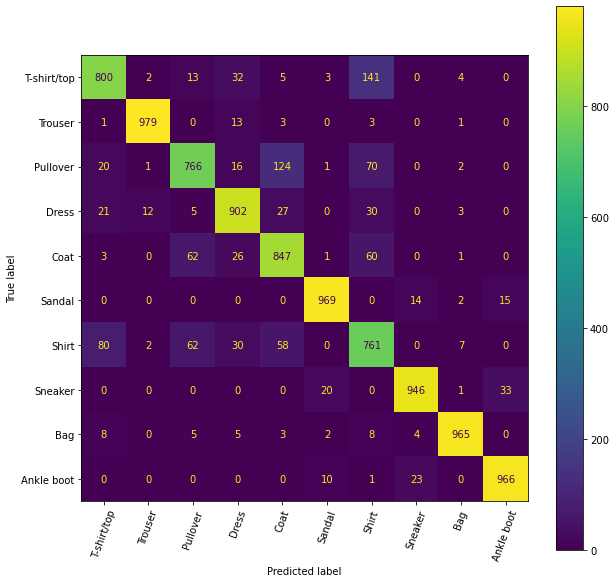

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, y_pred_class), display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

Модель путает T-Shirt/top и Shirt, а еще Pullover и Coat. Но хорошо распознает классы Ankle boot и Trouser, например.